# Exploratory Data Analysis Mobility patterns

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import warnings
warnings.filterwarnings("ignore")
import os

## Data

In this section, we use the following datasets: 

- Apple_Mobility_Reports
- Descartes_Lab_Mobility_Change
- Foursquare_Community_Mobility_Data
- Foursquare_COVID-19_National_Regional

## Apple Mobility Reports

## How much has changed the number of route requests that people did over the year? 

The relative amount of transit, driving and walking route requests for state compared to the baseline volume on January 13, 2020. The dataset records ranges from Jan 2020 to October 2020.

About This Data
The data shows a relative volume of directions requests per region or city compared to a baseline volume on January 13th, 2020. A day is defined as midnight-to-midnight, Pacific time. Cities are defined as the greater metropolitan area and their geographic boundaries remain constant across the data set. In many countries/regions, sub-regions, and cities, relative volume has increased since January 13th, consistent with normal, seasonal usage of Apple Maps. Day of week effects are important to normalize before to use the data. Data that is sent from users’ devices to the Maps service is associated with random, rotating identifiers so Apple doesn’t have a profile of individual movements and searches. 

Apple Maps has no demographic information about the users. Statements about representativeness of usage against the overall population can't be extracted directly from data.

### Questions:
- How the transportation types have been affected during the year with regard to the baseline volume (nationwide and by states)?
- Based on the reference volume of requests, can we identify states more/less disrupted in terms of weekly and montly directions requests (by type of request)?

In [2]:
df_apple = pd.read_csv('../data/interim/mobility/apple_states.csv')

In [3]:
df_apple.head()

,STATE,NAME,geo_type,transportation_type,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,...,2020-10-15,2020-10-16,2020-10-17,2020-10-18,2020-10-19,2020-10-20,2020-10-21,2020-10-22,2020-10-23,2020-10-24
0,1,Alabama,sub-region,transit,United States,100.0,105.66,105.66,106.80,121.02,...,114.57,134.99,133.45,108.24,109.38,101.51,112.59,117.37,128.92,115.23
1,2,Alaska,sub-region,transit,United States,100.0,87.49,84.60,85.37,90.95,...,65.16,67.66,63.91,51.68,71.61,61.89,61.50,59.48,57.27,58.04
2,4,Arizona,sub-region,transit,United States,100.0,105.14,102.33,100.78,106.42,...,67.18,73.00,69.81,58.93,68.81,65.32,68.64,65.85,73.14,70.20
3,5,Arkansas,sub-region,transit,United States,100.0,100.22,105.73,107.64,119.90,...,115.40,129.85,134.63,102.59,107.48,109.05,103.65,108.09,124.34,108.26
4,6,California,sub-region,transit,United States,100.0,102.59,103.78,100.18,110.55,...,48.50,53.91,49.18,43.26,47.99,47.51,46.72,46.69,51.79,47.54


In [4]:
df_apple.describe()

,STATE,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,...,2020-10-15,2020-10-16,2020-10-17,2020-10-18,2020-10-19,2020-10-20,2020-10-21,2020-10-22,2020-10-23,2020-10-24
count,153.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,28.960784,100.0,101.520350,101.581399,103.033217,116.838671,114.866923,89.963287,99.656434,101.025175,...,126.562797,147.672028,152.306014,107.413357,111.600699,112.295524,115.879930,121.238671,143.034965,143.380070
std,15.728319,0.0,7.144243,8.482508,9.220419,17.824657,23.395854,15.138741,12.546979,12.825656,...,46.777737,59.047939,60.808982,37.692186,37.694726,37.643346,39.751249,41.874534,53.264986,55.722127
min,1.000000,100.0,43.610000,41.640000,46.020000,64.040000,70.570000,51.350000,39.040000,36.660000,...,26.280000,28.270000,27.600000,22.930000,26.380000,26.280000,26.150000,26.930000,30.880000,30.510000
25%,16.000000,100.0,99.345000,98.540000,99.550000,106.300000,98.370000,80.945000,92.335000,95.805000,...,83.465000,89.060000,92.245000,74.605000,78.785000,77.415000,78.980000,80.570000,91.860000,87.410000
50%,29.000000,100.0,102.250000,103.100000,104.410000,121.340000,112.450000,89.120000,100.240000,101.010000,...,134.370000,154.880000,160.390000,116.680000,118.590000,119.790000,123.720000,129.450000,153.790000,154.460000
75%,42.000000,100.0,104.415000,106.030000,109.150000,129.110000,127.560000,98.115000,105.830000,105.015000,...,152.030000,185.405000,192.275000,130.380000,132.970000,134.520000,140.195000,148.110000,179.435000,177.430000
max,56.000000,100.0,126.840000,119.670000,128.680000,156.130000,183.890000,145.340000,139.880000,159.160000,...,253.430000,300.980000,306.870000,228.600000,225.970000,209.130000,217.650000,229.730000,286.430000,333.050000


Grouping by type of transportation:

In [5]:
df_apple.groupby('transportation_type').count()

,STATE,NAME,geo_type,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,...,2020-10-15,2020-10-16,2020-10-17,2020-10-18,2020-10-19,2020-10-20,2020-10-21,2020-10-22,2020-10-23,2020-10-24
transportation_type,,,,,,,,,,,,,,,,,,,,,
driving,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
transit,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43
walking,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50


Filtering by a particular state:

In [6]:
df_apple[df_apple.NAME == 'California']

,STATE,NAME,geo_type,transportation_type,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,...,2020-10-15,2020-10-16,2020-10-17,2020-10-18,2020-10-19,2020-10-20,2020-10-21,2020-10-22,2020-10-23,2020-10-24
4,6,California,sub-region,transit,United States,100.0,102.59,103.78,100.18,110.55,...,48.50,53.91,49.18,43.26,47.99,47.51,46.72,46.69,51.79,47.54
55,6,California,sub-region,driving,United States,100.0,104.39,109.34,109.36,129.78,...,111.24,132.68,128.37,103.35,101.73,103.03,105.41,109.51,129.54,125.57
106,6,California,sub-region,walking,United States,100.0,104.70,106.03,98.45,123.92,...,108.01,131.99,142.74,104.84,99.50,101.11,102.61,104.45,127.15,136.21


Extra-proprocessing

1. Melt dataset to generate just one `date` column associated to `route_requests` values by `transportation_type`.
2. Transform the `date` column to `datetime`.
3. Extract week and month from `date` to resample.

In [7]:
date_columns = df_apple.columns[5:]
date_nocolumns = df_apple.columns[:5]

In [8]:
df_apple_melt = pd.melt(df_apple, id_vars=date_nocolumns, value_vars=date_columns, value_name='route_requests', var_name='date')

In [9]:
df_apple_melt['date'] = df_apple_melt.date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [10]:
df_apple_melt['date_month'] = df_apple_melt.date.apply(lambda x: x.month)
df_apple_melt['date_week'] = df_apple_melt.date.apply(lambda x: x.week)

In [11]:
df_apple_melt[df_apple_melt.STATE == 1].head(2)

,STATE,NAME,geo_type,transportation_type,country,date,route_requests,date_month,date_week
0,1,Alabama,sub-region,transit,United States,2020-01-13,100.0,1,3
51,1,Alabama,sub-region,driving,United States,2020-01-13,100.0,1,3


#### Split by type of transportation:

In [12]:
df_transit = df_apple_melt[df_apple_melt.transportation_type == 'transit']
df_driving = df_apple_melt[df_apple_melt.transportation_type == 'driving']
df_walking = df_apple_melt[df_apple_melt.transportation_type == 'walking']

#### Resampling weekly to smooth visualizations:

In [13]:
df_transit.set_index('date', inplace=True)
df_transit_weekly = df_transit.resample('W').mean()

df_driving.set_index('date', inplace=True)
df_driving_weekly = df_driving.resample('W').mean()

df_walking.set_index('date', inplace=True)
df_walking_weekly = df_walking.resample('W').mean()

## 1. Nationwide trends

### National trends by type of transportation (weekly resample)

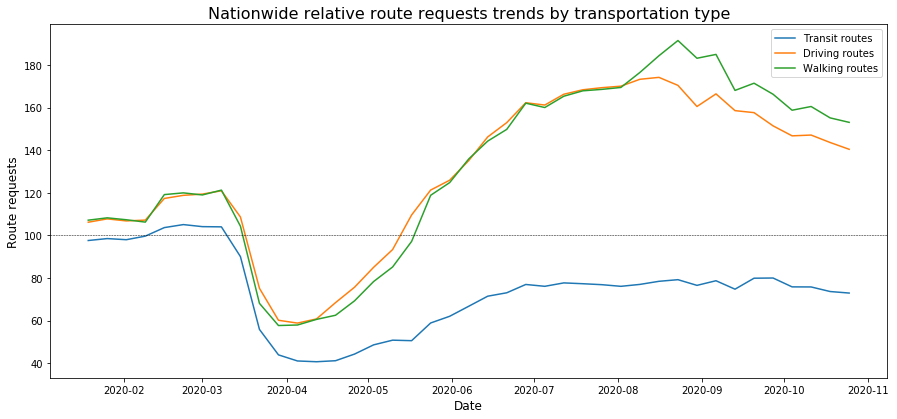

In [14]:
_ = plt.figure(figsize=(15, 6.5))
_ = sns.lineplot(data=df_transit_weekly, x=df_transit_weekly.index, y='route_requests', label='Transit routes')
_ = sns.lineplot(data=df_driving_weekly, x=df_driving_weekly.index, y='route_requests', label='Driving routes')
_ = sns.lineplot(data=df_walking_weekly, x=df_walking_weekly.index, y='route_requests', label='Walking routes')
_ = plt.axhline(y=100, color='k', linestyle='--', label='Baseline, January 13th, 2020', lw=0.5)
_ = plt.title('Nationwide relative route requests trends by transportation type', size=16)
_ = plt.xlabel('Date', size=12)
_ = plt.ylabel('Route requests', size=12)

The figure above explores the nationwide directions requests over the year by type of transportation relative to a baseline volume (January 13th, 2020), consistent with normal. The overall route requests dropped significantly with the lockdowns across the country, but from April, driving and walking requests incremented at same strong rate, specially during the summer season, but both declined from the spring. Transit experimented a slow increase during the autumn to keep practically constant from the summer onwards. 

### Weekly and Monthly National trends by type of transportation

In [15]:
df_monthly = df_apple_melt.groupby(['STATE', 'NAME', 'transportation_type', 'date_month']).mean()['route_requests'].reset_index()
df_weekly = df_apple_melt.groupby(['STATE', 'NAME', 'transportation_type', 'date_week']).mean()['route_requests'].reset_index()

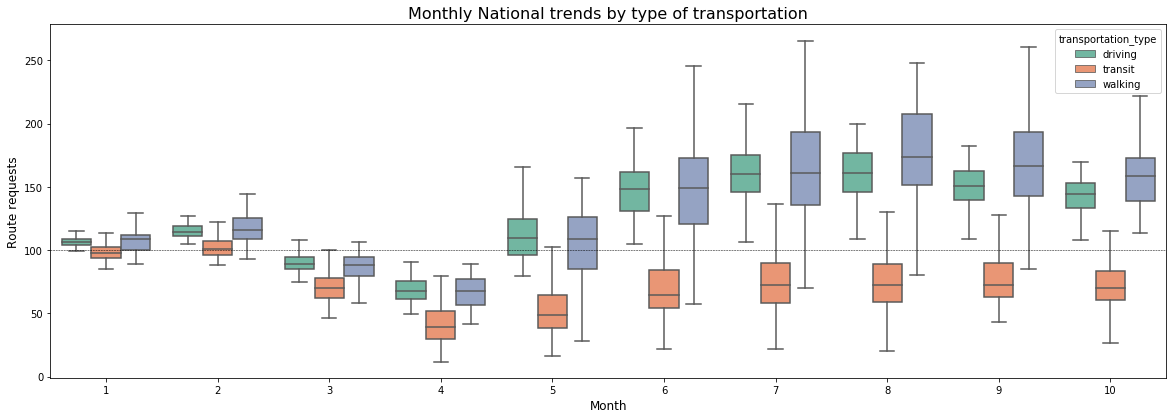

In [16]:
plt.figure(figsize=(20, 6.5))
_ = sns.boxplot(x='date_month', y='route_requests', hue='transportation_type', data=df_monthly, showfliers=False, palette='Set2')
_ = plt.axhline(y=100, color='k', linestyle='--', label='Baseline, January 13th, 2020', lw=0.5)
_ = plt.title('Monthly National trends by type of transportation', size=16)
_ = plt.xlabel('Month', size=12)
_ = plt.ylabel('Route requests', size=12)

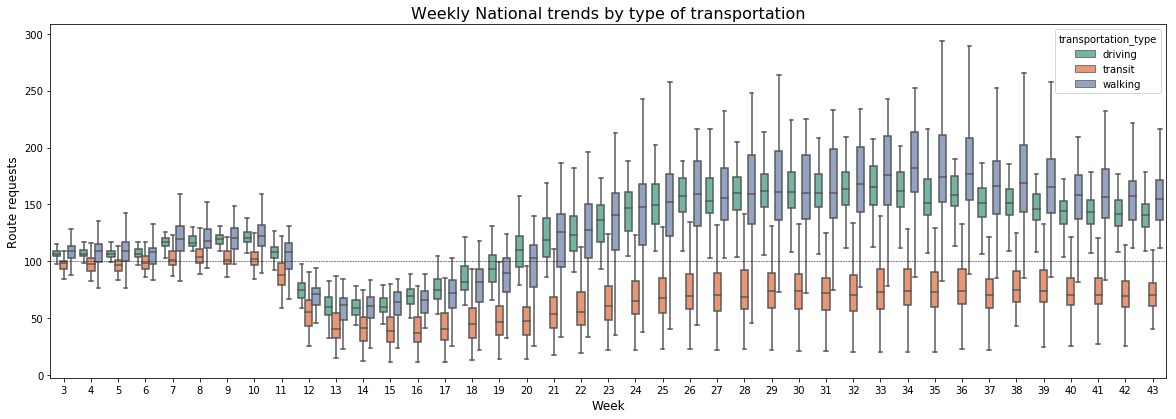

In [17]:
plt.figure(figsize=(20, 6.5))
_ = sns.boxplot(x='date_week', y='route_requests', hue='transportation_type', data=df_weekly, showfliers=False, palette='Set2')
_ = plt.axhline(y=100, color='k', linestyle='--', label='Baseline, January 13th, 2020', lw=0.5)
_ = plt.title('Weekly National trends by type of transportation', size=16)
_ = plt.xlabel('Week', size=12)
_ = plt.ylabel('Route requests', size=12)

Between the weeks 11th and 13th governors in different states announced statewide orders to stay at home for non-essential workforce (California, New York, New Jersey, Ohio, Louisiana, Massachusetts and so on). It's interesting to note that between weeks 11 and 19, the mean of route requests for driving and walking are under the baseline across the country. From then, the mean of directions requests are is over the median and the deviation of the weekly average by state increase. The increment of the p50, p75 of the weekly requests answer to seasonality (summer vacations) and the variability into every boxplot can be explained for the independent management that every state did related to the stay-at-home restrictions.

#### Time serie additive decomposition

Instead of get a smooth curve resampling the data, we can decompose the timeserie in its elements, asumming an additive behavior (*this is correct if we verify that the noise component offers little values. If there are some patterns in the noise or huge values, their addition to the signal affects strongly the reconstruction of the signal. In that case, we must check the nature of the timeserie applying multiplicative decomposition*).

Why is this relevant? If we apply forecasting to predict mobility variables during the next yeat we need to use signals which behavior is strongly defined by trends and regular and predictable seasonal components. In other words, signals with minimum noise components.

In [18]:
df_nation = df_apple_melt.groupby(['transportation_type', 'date']).mean()['route_requests'].reset_index()

In [19]:
df_transit_nation = df_nation[df_nation.transportation_type == 'transit']
df_driving_nation = df_nation[df_nation.transportation_type == 'driving']
df_walking_nation = df_nation[df_nation.transportation_type == 'walking']

In [20]:
df_transit_nation.set_index('date', inplace=True)
df_driving_nation.set_index('date', inplace=True)
df_walking_nation.set_index('date', inplace=True)

In [21]:
def serie_decomposition(df, colname, model='additive', display=False):
    if df[colname].isnull().any():
        df.fillna(method='ffill', inplace=True)
    result_add = seasonal_decompose(df[colname], model=model, extrapolate_trend='freq')
    df_reconstructed = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis=1)
    df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
    
    
    if display:
        plt.rcParams.update({'figure.figsize': (10,10)})
        result_add.plot().suptitle('Additive Decompose', fontsize=16)
        plt.show()
        
    return df_reconstructed

Applying additive and multiplicative models to decompose the transit signal:

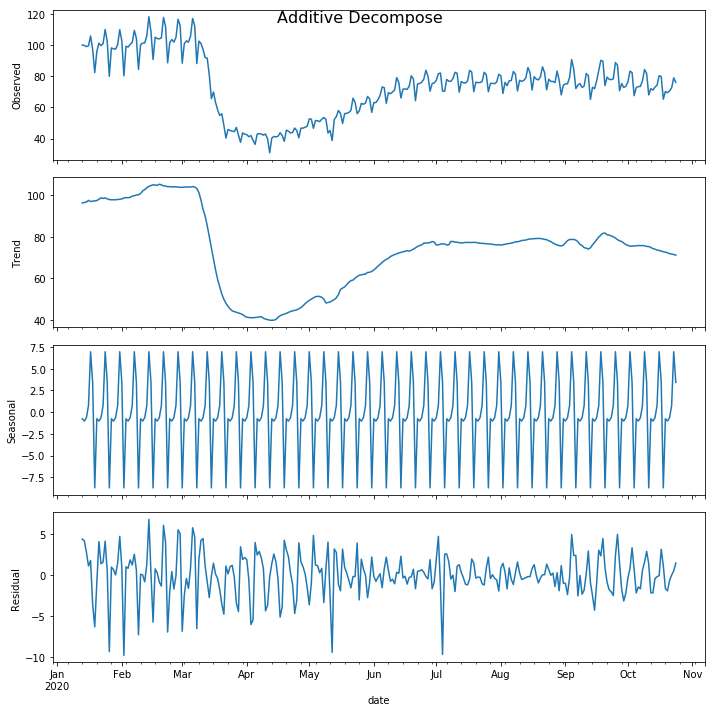

In [22]:
out1 = serie_decomposition(df_transit_nation, 
                    colname='route_requests', 
                    model='additive', 
                    display=True)

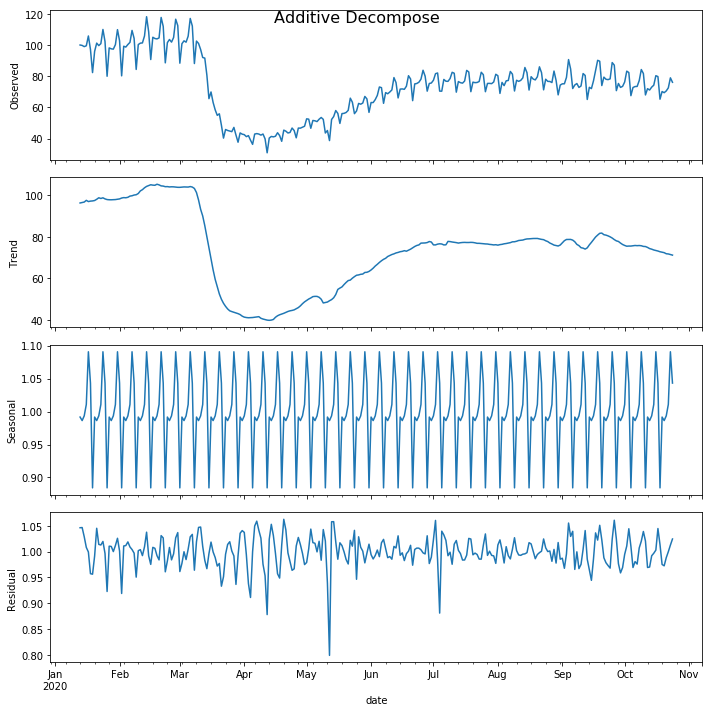

In [23]:
out1 = serie_decomposition(df_transit_nation, 
                    colname='route_requests', 
                    model='multiplicative', 
                    display=True)

We realize that the additive model explains the signal, since the values of the noise components are small.

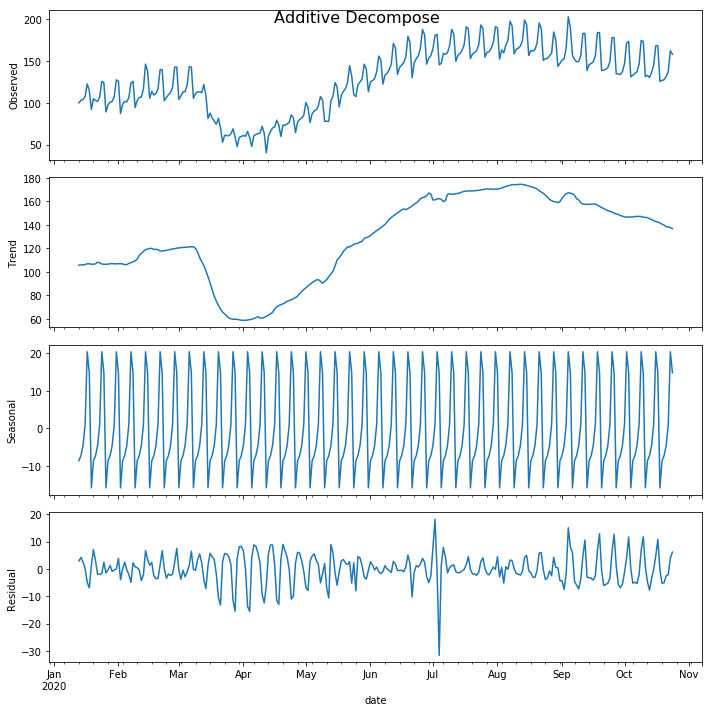

In [24]:
out2 = serie_decomposition(df_driving_nation, 
                    colname='route_requests', 
                    model='additive', 
                    display=True)

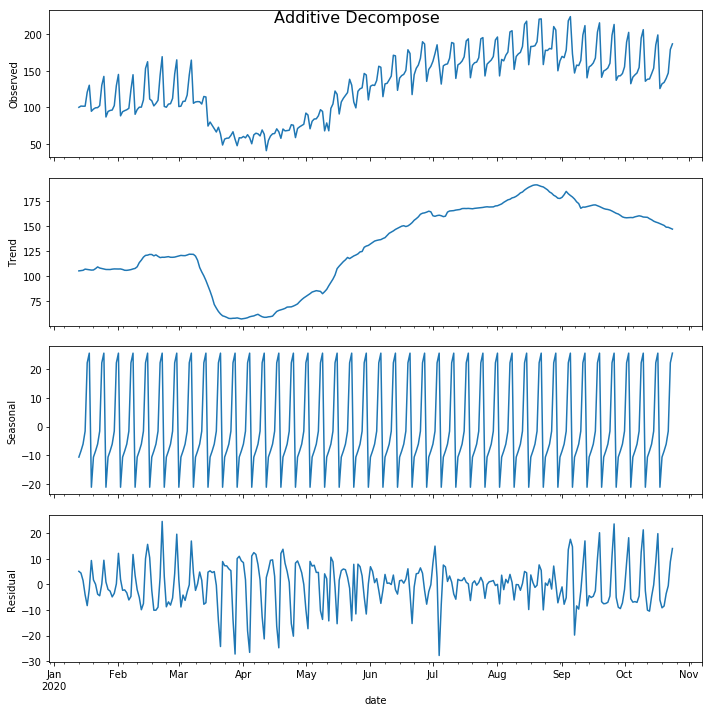

In [25]:
out3 = serie_decomposition(df_walking_nation, 
                    colname='route_requests', 
                    model='additive', 
                    display=True)

And then, ploting the three trends signals, 

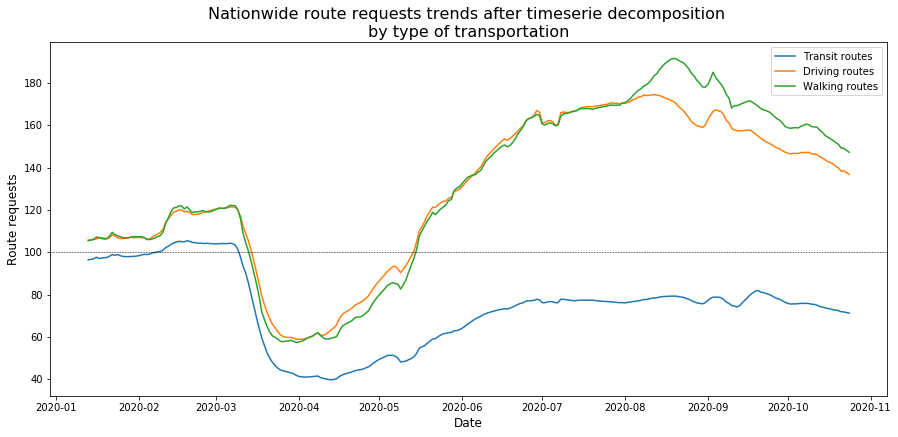

In [44]:
_ = plt.figure(figsize=(15, 6.5))
_ = plt.plot(out1.trend, label='Transit routes')
_ = plt.plot(out2.trend, label='Driving routes')
_ = plt.plot(out3.trend, label='Walking routes')
_ = plt.axhline(y=100, color='k', linestyle='--', label='Baseline, January 13th, 2020', lw=0.5)
_ = plt.title('Nationwide route requests trends after timeserie decomposition \nby type of transportation', size=16)
_ = plt.xlabel('Date', size=12)
_ = plt.ylabel('Route requests', size=12)
_ = plt.legend(('Transit routes', 'Driving routes', 'Walking routes'))

In [45]:
#df_nation['rolling_2'] = df_nation.iloc[:, -1].rolling(window=7).mean()
#_ = sns.lineplot(data=df_nation, hue='transportation_type', x='date', y= 'rolling_2')

In [26]:
#_ = plt.figure(figsize=(15, 6.5))
#_ = plt.plot(out1.seas)
#_ = plt.plot(out2.seas)
#_ = plt.plot(out3.seas)

In [27]:
#_ = plt.figure(figsize=(15, 6.5))
#_ = plt.plot(out1.resid)
#_ = plt.plot(out2.resid)
#_ = plt.plot(out3.resid)

## 2. Statewide trends

In [49]:
order_states_avg = df_apple_melt[df_apple_melt.transportation_type == 'transit'].groupby('NAME')['route_requests'].mean().sort_values(ascending=True)

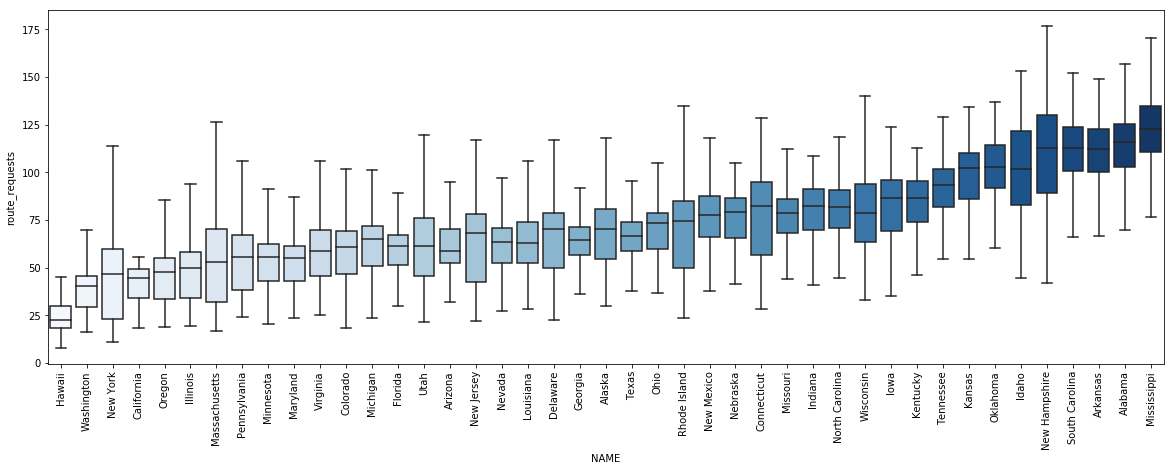

In [50]:
_ = plt.figure(figsize=(20, 6.5))
_ = sns.boxplot(x='NAME', 
                y='route_requests', 
                data=df_apple_melt[df_apple_melt.transportation_type == 'transit'], 
                showfliers=False, 
                palette='Blues',
                order=order_states_avg.index)
_ = plt.axhline(y=100, color='k', linestyle='--', label='Baseline, January 13th, 2020', lw=0.5)
_ = plt.xticks(rotation=90)

In [54]:
order_states_avg = df_apple_melt[df_apple_melt.transportation_type == 'driving'].groupby('NAME')['route_requests'].mean().sort_values(ascending=True)

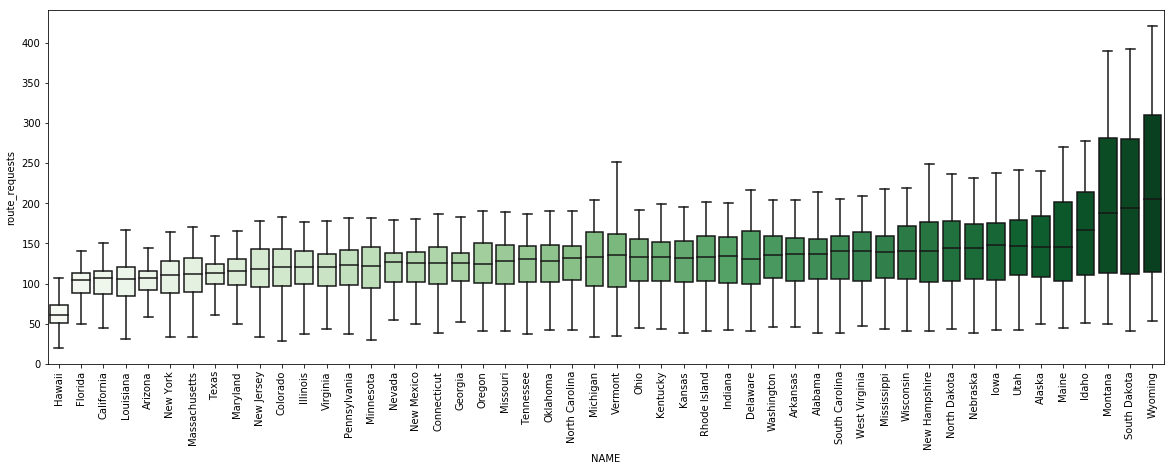

In [55]:
_ = plt.figure(figsize=(20, 6.5))
_ = sns.boxplot(x='NAME', 
                y='route_requests', 
                data=df_apple_melt[df_apple_melt.transportation_type == 'driving'], 
                showfliers=False, 
                palette='Greens',
                order=order_states_avg.index)
_ = plt.axhline(y=100, color='k', linestyle='--', label='Baseline, January 13th, 2020', lw=0.5)
_ = plt.xticks(rotation=90)

In [56]:
order_states_avg = df_apple_melt[df_apple_melt.transportation_type == 'walking'].groupby('NAME')['route_requests'].mean().sort_values(ascending=True)

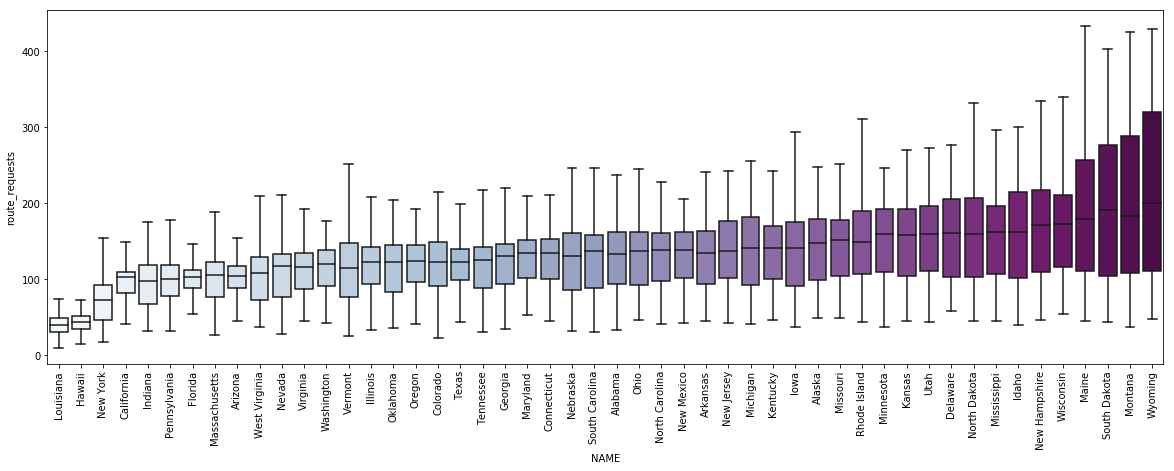

In [57]:
_ = plt.figure(figsize=(20, 6.5))
_ = sns.boxplot(x='NAME', 
                y='route_requests', 
                data=df_apple_melt[df_apple_melt.transportation_type == 'walking'], 
                showfliers=False, 
                palette='BuPu',
                order=order_states_avg.index)
_ = plt.axhline(y=100, color='k', linestyle='--', label='Baseline, January 13th, 2020', lw=0.5)
_ = plt.xticks(rotation=90)

Zoom in March-April:
    define a point when "lockdowns started" to compare min, max, median an average moblity by type of transport and by state. Seasonality, trend analysis. Identify states with more and less route requests. Pending: compare with covid-data by state

## Foursquare Community Mobility Data and Foot Traffic:

## How much has changed the foot traffic in food venues (grocery, convenience, discount stores versus fast food and casual dining restaurants)?


- Foot traffic is a term used in business to describe the number of customers that enter a store, mall, or location.
- Foot traffic numbers are heavily monitored by store owners in particular retail stores, such as department stores.
- Foot traffic is an important metric because higher foot traffic tends to lead to higher sales and revenue numbers.


This free data set contains indexed foot traffic to 19 categories of venues. The indexed data is broken out geographically, with included data for National, SF, NYC, LA, and Seattle. The data is normalized against U.S. Census data to remove age, gender and geographical bias. Data is provided daily from 02/19/2020.

In [159]:
df_foursquare_dma = pd.read_csv('../data/interim/mobility/foursquare_dma.csv', index_col=0)
df_foursquare_national = pd.read_csv('../data/interim/mobility/foursquare_national.csv', index_col=0)
df_foursquare_regional = pd.read_csv('../data/interim/mobility/foursquare_regional.csv', index_col=0)
df_foursquare_states = pd.read_csv('../data/interim/mobility/foursquare_states.csv')

### 1. Nationwide foot traffic to food venues 

In [91]:
df_foursquare_national.head()

,Airports,Auto Dealerships,Automotive Shops,Banks,Bars,Big Box Stores,Casual Dining,Clothing Stores,Convenience Stores,Discount Stores,...,Parks,Pet Stores,Pharmacies and Drugstores,Salons / Barbershops,Shopping Malls,Trails,Veterinarians,Warehouse Stores,Wireless Carriers,class
,,,,,,,,,,,,,,,,,,,,,
2020-02-19,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,National Summary
2020-02-20,99.149526,100.181051,99.935928,99.974743,100.151974,96.625050,99.451066,98.487323,98.530137,95.499104,...,100.116900,99.742107,96.809224,99.020273,98.652638,100.279281,99.594170,98.598645,99.646111,National Summary
2020-02-21,98.608798,100.500423,99.928920,99.244672,99.738296,94.545632,95.764907,96.769581,97.104246,92.553366,...,100.397537,99.033417,93.079389,98.265315,96.186247,100.510579,99.678145,98.123992,98.848898,National Summary
2020-02-22,98.655830,101.312311,100.436276,99.125267,99.836801,94.068177,95.251611,96.107070,97.002805,92.890473,...,101.762502,98.761537,92.504942,98.429050,95.603758,100.806792,100.012058,98.751521,98.833483,National Summary
2020-02-23,99.774063,101.322559,100.523527,99.087651,98.778097,94.020467,93.962191,94.841228,97.048518,93.168039,...,102.614516,98.360710,92.250800,98.707866,94.350623,101.227613,100.039507,99.228257,99.292892,National Summary


In [92]:
df_foursquare_national.index = pd.to_datetime(df_foursquare_national.index)

In [74]:
df_foursquare_national.columns

Index([' ', 'Airports', 'Auto Dealerships', 'Automotive Shops', 'Banks',
       'Bars', 'Big Box Stores', 'Casual Dining', 'Clothing Stores',
       'Convenience Stores', 'Discount Stores', 'Fast Food Restaurants',
       'Furniture / Home Stores', 'Gas Stations', 'Grocery Stores',
       'Gyms or Fitness Centers', 'Hardware Stores', 'Hotels', 'Liquor Stores',
       'Movie Theaters', 'Nail Salons', 'Offices', 'Parks', 'Pet Stores',
       'Pharmacies and Drugstores', 'Salons / Barbershops', 'Shopping Malls',
       'Trails', 'Veterinarians', 'Warehouse Stores', 'Wireless Carriers',
       'class'],
      dtype='object')

In [93]:
df_foursquare_national.index 

DatetimeIndex(['2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28',
               ...
               '2020-11-11', '2020-11-12', '2020-11-13', '2020-11-14',
               '2020-11-15', '2020-11-16', '2020-11-17', '2020-11-18',
               '2020-11-19', '2020-11-20'],
              dtype='datetime64[ns]', name=' ', length=276, freq=None)

In [31]:
_ = plt.figure(figsize=(15, 6.5))
_ = sns.lineplot(y=df_foursquare_national['Casual Dining'], x=df_foursquare_national.index, label='Casual Dining')
_ = sns.lineplot(y=df_foursquare_national['Convenience Stores'], x=df_foursquare_national.index, label='Convenience Stores')
_ = sns.lineplot(y=df_foursquare_national['Fast Food Restaurants'], x=df_foursquare_national.index, label='Fast Food Restaurants')
_ = sns.lineplot(y=df_foursquare_national['Discount Stores'], x=df_foursquare_national.index, label='Discount Stores')
_ = sns.lineplot(y=df_foursquare_national['Grocery Stores'], x=df_foursquare_national.index, label='Grocery Stores')
_ = sns.lineplot(y=df_foursquare_national['Big Box Stores'], x=df_foursquare_national.index, label='Big Box Stores')


_ = plt.axhline(y=100, color='k', linestyle='--', label='Baseline, January 13th, 2020', lw=0.5)
_ = plt.title('Nationwide indexed foot traffic for food venues over time', size=16)
_ = plt.xlabel('Date', size=12)
_ = plt.ylabel('Indexed Foot Traffic', size=12)

NameError: name 'df_foursquare_national' is not defined

<Figure size 1080x468 with 0 Axes>

### 2. Casual Dinings by city

In [98]:
df_foursquare_dma.index = pd.to_datetime(df_foursquare_dma.index)

In [104]:
df_foursquare_dma['class'].unique()

array(['Airports', 'Auto Dealerships', 'Auto Shops', 'Banks', 'Bars',
       'Big Box Stores', 'Casual Dining Chains', 'Clothing Stores',
       'Convenience Store', 'Drugstores & Pharmacies', 'Discount Stores',
       'Fast Food', 'Furniture Stores', 'Gas Stations', 'Grocery Stores',
       'Gyms', 'Hardware Stores', 'Hotels', 'Movie Theaters',
       'Nail Salons', 'Liquor Stores', 'Offices', 'Pet Stores', 'Parks',
       'SalonsBarbershops', 'Shopping Malls', 'Trails', 'Warehouse Stores',
       'Wireless Carriers'], dtype=object)

In [106]:
df_foursquare_dma_casual_dining = df_foursquare_dma[df_foursquare_dma['class'] == 'Casual Dining Chains']
df_foursquare_dma_casual_convenience = df_foursquare_dma[df_foursquare_dma['class'] == 'Convenience Stores']
df_foursquare_dma_casual_bigbox = df_foursquare_dma[df_foursquare_dma['class'] == 'Big Box Stores']
df_foursquare_dma_casual_fastfood = df_foursquare_dma[df_foursquare_dma['class'] == 'Fast Food']
df_foursquare_dma_casual_grocery = df_foursquare_dma[df_foursquare_dma['class'] == 'Grocery Stores']
df_foursquare_dma_casual_discount = df_foursquare_dma[df_foursquare_dma['class'] == 'Discount Stores']

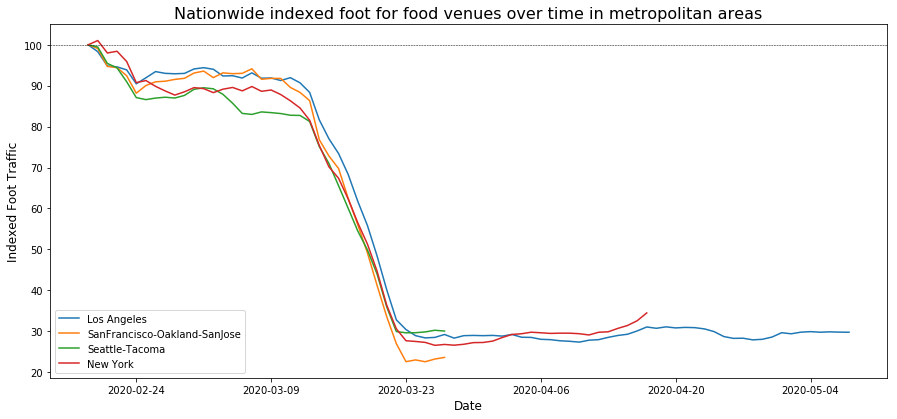

In [111]:
x = df_foursquare_dma_casual_dining.index


_ = plt.figure(figsize=(15, 6.5))
_ = sns.lineplot(y=df_foursquare_dma_casual_dining['Los Angeles'], x=x, label='Los Angeles')
_ = sns.lineplot(y=df_foursquare_dma_casual_dining['SanFrancisco-Oakland-SanJose'], x=x, label='SanFrancisco-Oakland-SanJose')
_ = sns.lineplot(y=df_foursquare_dma_casual_dining['Seattle-Tacoma'], x=x, label='Seattle-Tacoma')
_ = sns.lineplot(y=df_foursquare_dma_casual_dining['New York'], x=x, label='New York')

_ = plt.axhline(y=100, color='k', linestyle='--', label='Baseline, January 13th, 2020', lw=0.5)
_ = plt.title('Nationwide indexed foot for food venues over time in metropolitan areas', size=16)
_ = plt.xlabel('Date', size=12)
_ = plt.ylabel('Indexed Foot Traffic', size=12)

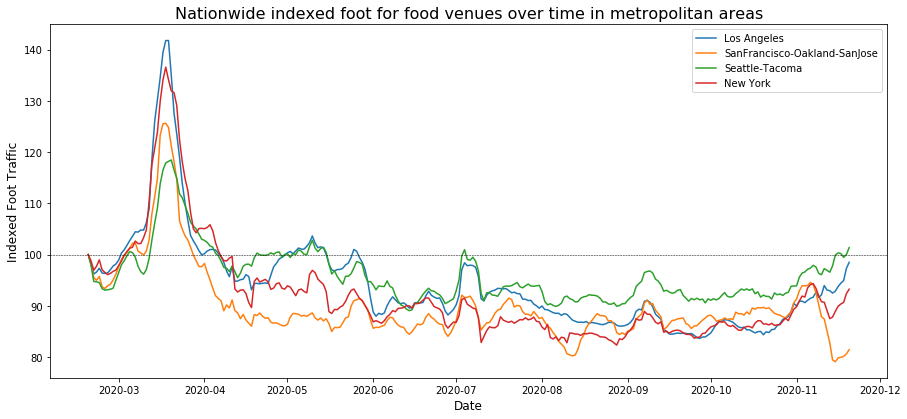

In [113]:
x = df_foursquare_dma_casual_grocery.index
y = df_foursquare_dma_casual_grocery

_ = plt.figure(figsize=(15, 6.5))
_ = sns.lineplot(y=y['Los Angeles'], x=x, label='Los Angeles')
_ = sns.lineplot(y=y['SanFrancisco-Oakland-SanJose'], x=x, label='SanFrancisco-Oakland-SanJose')
_ = sns.lineplot(y=y['Seattle-Tacoma'], x=x, label='Seattle-Tacoma')
_ = sns.lineplot(y=y['New York'], x=x, label='New York')

_ = plt.axhline(y=100, color='k', linestyle='--', label='Baseline, January 13th, 2020', lw=0.5)
_ = plt.title('Nationwide indexed foot for food venues over time in metropolitan areas', size=16)
_ = plt.xlabel('Date', size=12)
_ = plt.ylabel('Indexed Foot Traffic', size=12)

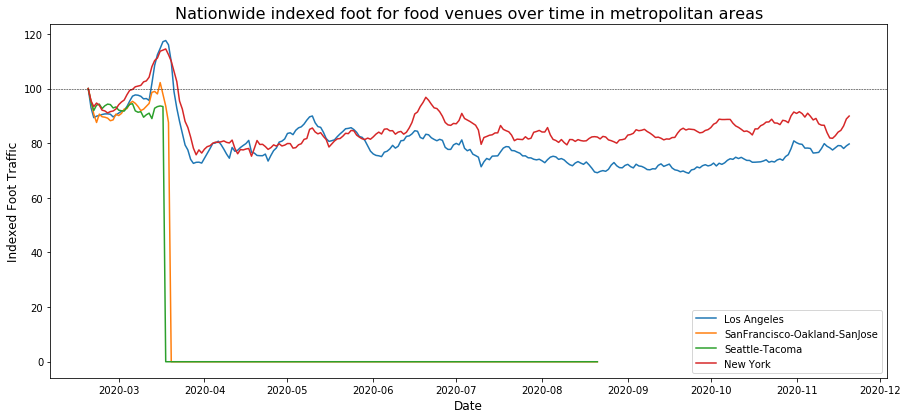

In [114]:
x = df_foursquare_dma_casual_discount.index
y = df_foursquare_dma_casual_discount

_ = plt.figure(figsize=(15, 6.5))
_ = sns.lineplot(y=y['Los Angeles'], x=x, label='Los Angeles')
_ = sns.lineplot(y=y['SanFrancisco-Oakland-SanJose'], x=x, label='SanFrancisco-Oakland-SanJose')
_ = sns.lineplot(y=y['Seattle-Tacoma'], x=x, label='Seattle-Tacoma')
_ = sns.lineplot(y=y['New York'], x=x, label='New York')

_ = plt.axhline(y=100, color='k', linestyle='--', label='Baseline, January 13th, 2020', lw=0.5)
_ = plt.title('Nationwide indexed foot for food venues over time in metropolitan areas', size=16)
_ = plt.xlabel('Date', size=12)
_ = plt.ylabel('Indexed Foot Traffic', size=12)

### 3. Casual Dinings by region

In [117]:
df_foursquare_regional.index = pd.to_datetime(df_foursquare_regional.index)

In [118]:
df_foursquare_regional.columns

Index(['Midwest', 'Northeast', 'South', 'West', 'class'], dtype='object')

In [119]:
df_foursquare_regional_dining = df_foursquare_regional[df_foursquare_regional['class'] == 'Casual Dining Chains']
df_foursquare_regional_convenience = df_foursquare_regional[df_foursquare_regional['class'] == 'Convenience Stores']
df_foursquare_regional_bigbox = df_foursquare_regional[df_foursquare_regional['class'] == 'Big Box Stores']
df_foursquare_regional_fastfood = df_foursquare_regional[df_foursquare_regional['class'] == 'Fast Food']
df_foursquare_regional_grocery = df_foursquare_regional[df_foursquare_regional['class'] == 'Grocery Stores']
df_foursquare_regional_discount = df_foursquare_regional[df_foursquare_regional['class'] == 'Discount Stores']

In [146]:
def foot_traffic_venue(df, category):
    x = df.index

    _ = plt.figure(figsize=(15, 6.5))
    _ = sns.lineplot(y=df['Midwest'], x=x, label='Midwest')
    _ = sns.lineplot(y=df['Northeast'], x=x, label='Northeast')
    _ = sns.lineplot(y=df['South'], x=x, label='South')
    _ = sns.lineplot(y=df['West'], x=x, label='West')

    _ = plt.axhline(y=100, color='k', linestyle='--', label='Baseline, January 13th, 2020', lw=0.5)
    _ = plt.title('Indexed foot traffic in '+ category + ' venue over time by region', size=16)
    _ = plt.xlabel('Date', size=12)
    _ = plt.ylabel('Indexed Foot Traffic', size=12)

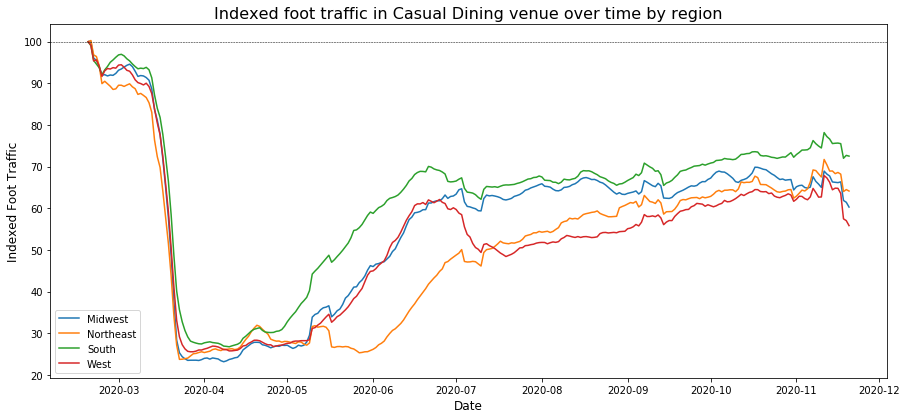

In [147]:
foot_traffic_venue(df_foursquare_regional_dining, 'Casual Dining')

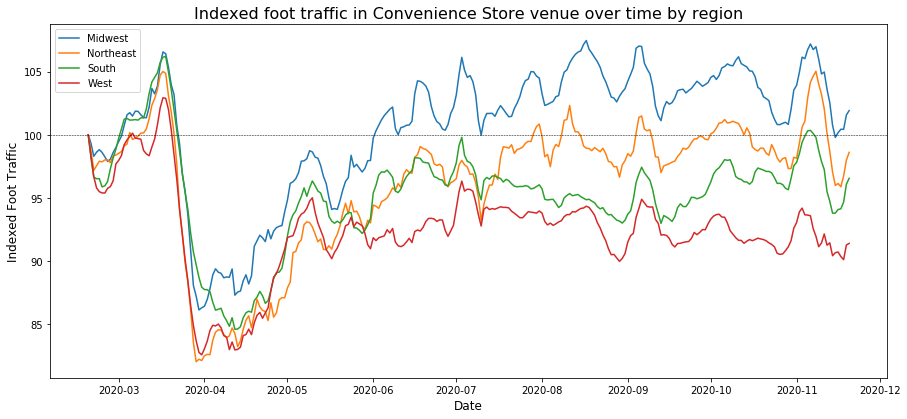

In [148]:
foot_traffic_venue(df_foursquare_regional_convenience, 'Convenience Store')

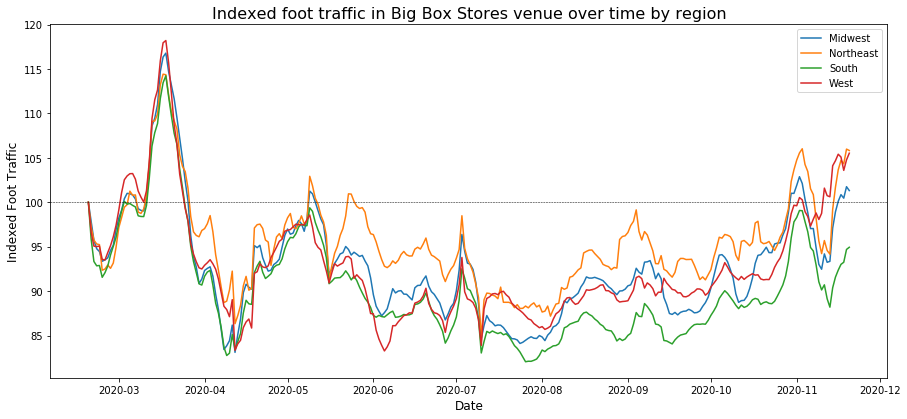

In [149]:
foot_traffic_venue(df_foursquare_regional_bigbox, 'Big Box Stores')

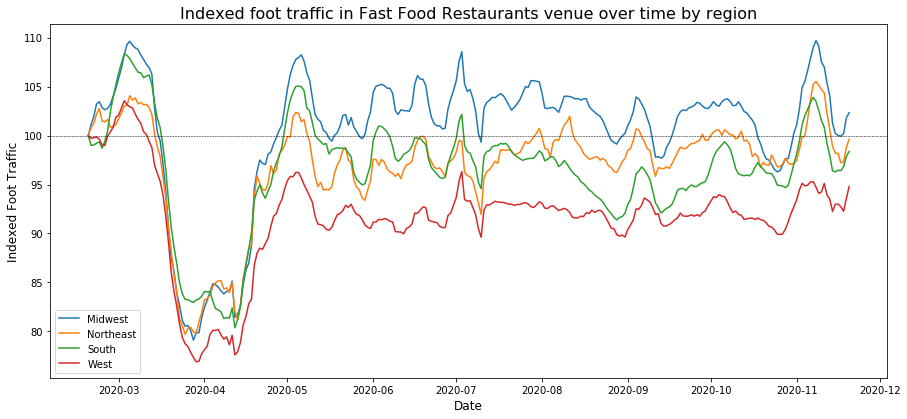

In [150]:
foot_traffic_venue(df_foursquare_regional_fastfood, 'Fast Food Restaurants')

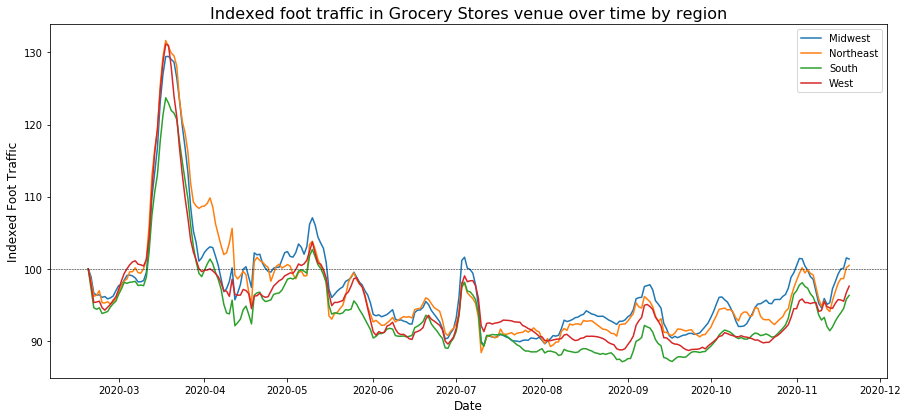

In [151]:
foot_traffic_venue(df_foursquare_regional_grocery, 'Grocery Stores')

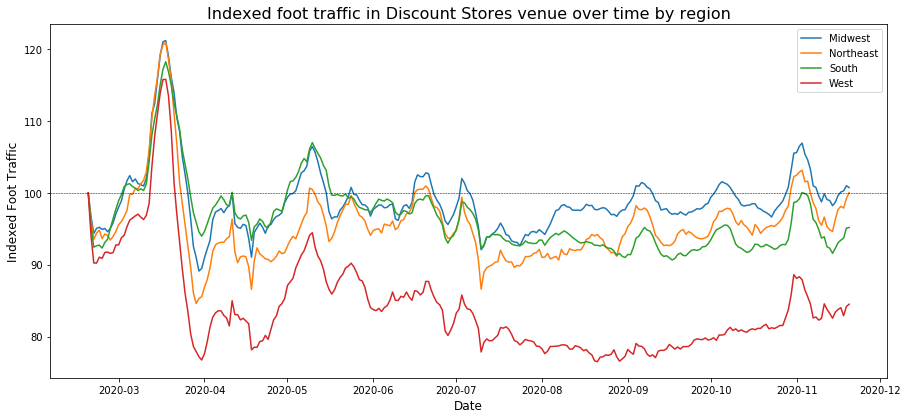

In [152]:
foot_traffic_venue(df_foursquare_regional_discount, 'Discount Stores')

In [126]:
df_foursquare_regional.head()

,Midwest,Northeast,South,West,class
,,,,,
2020-02-19,100.000000,100.000000,100.000000,100.000000,Airports
2020-02-20,98.985439,98.784850,99.066711,99.542233,Airports
2020-02-21,98.653149,97.100615,98.900379,99.023794,Airports
2020-02-22,98.573212,97.078371,99.067572,99.018896,Airports
2020-02-23,100.002053,97.720489,100.314338,100.064932,Airports


In [127]:
df_reg_dining_weekly = df_foursquare_regional_dining.resample('W').mean()
df_reg_convenience_weekly = df_foursquare_regional_convenience.resample('W').mean()
df_reg_bigbox_weekly = df_foursquare_regional_bigbox.resample('W').mean()
df_reg_fastfood_weekly = df_foursquare_regional_fastfood.resample('W').mean()
df_reg_grocery_weekly = df_foursquare_regional_grocery.resample('W').mean()
df_reg_discount_weekly = df_foursquare_regional_discount.resample('W').mean()

In [138]:
def regional_venues(region):
    x = df_reg_dining_weekly.index

    _ = plt.figure(figsize=(15, 6.5))
    _ = sns.lineplot(y=df_reg_dining_weekly[region], x=x, label='Casual Dining')
    _ = sns.lineplot(y=df_reg_convenience_weekly[region], x=x, label='Convenience Store')
    _ = sns.lineplot(y=df_reg_bigbox_weekly[region], x=x, label='Big Box Store')
    _ = sns.lineplot(y=df_reg_fastfood_weekly[region], x=x, label='Fast Food Restaurant')
    _ = sns.lineplot(y=df_reg_grocery_weekly[region], x=x, label='Grocery Store')
    _ = sns.lineplot(y=df_reg_discount_weekly[region], x=x, label='Discount Store')

    _ = plt.axhline(y=100, color='k', linestyle='--', label='Baseline, January 13th, 2020', lw=0.5)
    _ = plt.title(region+' indexed foot traffic in food venues over time \nWeekly basis', size=16)
    _ = plt.xlabel('Date', size=12)
    _ = plt.ylabel('Indexed Foot Traffic', size=12)

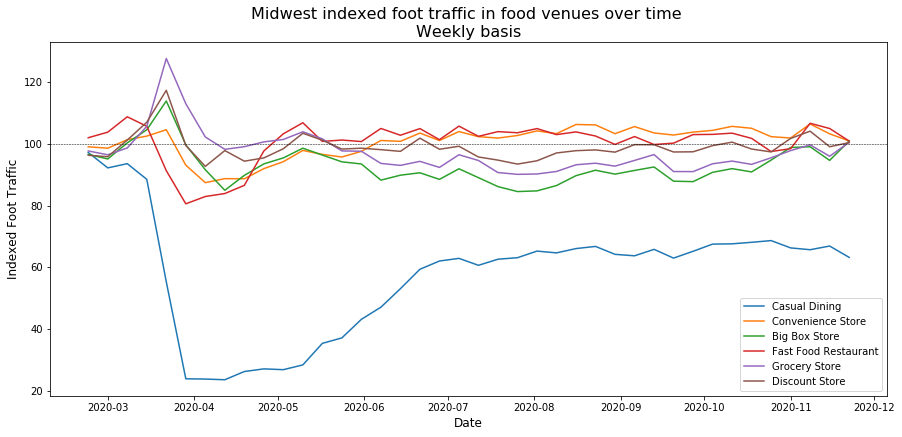

In [140]:
regional_venues('Midwest')

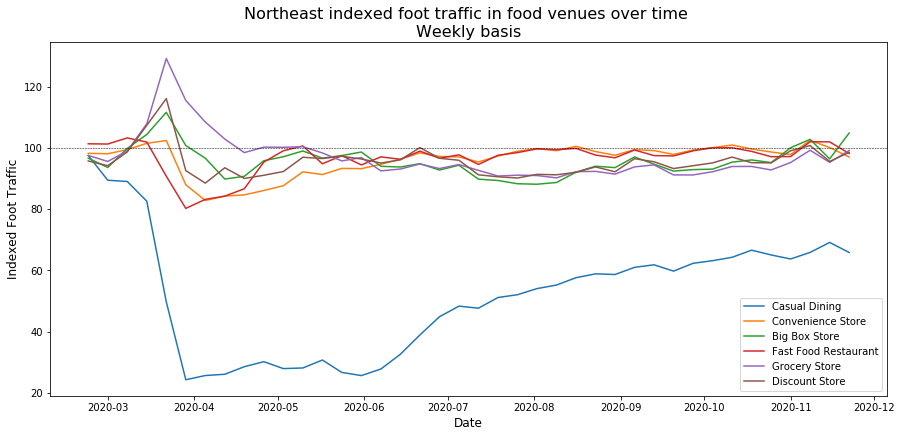

In [141]:
regional_venues('Northeast')

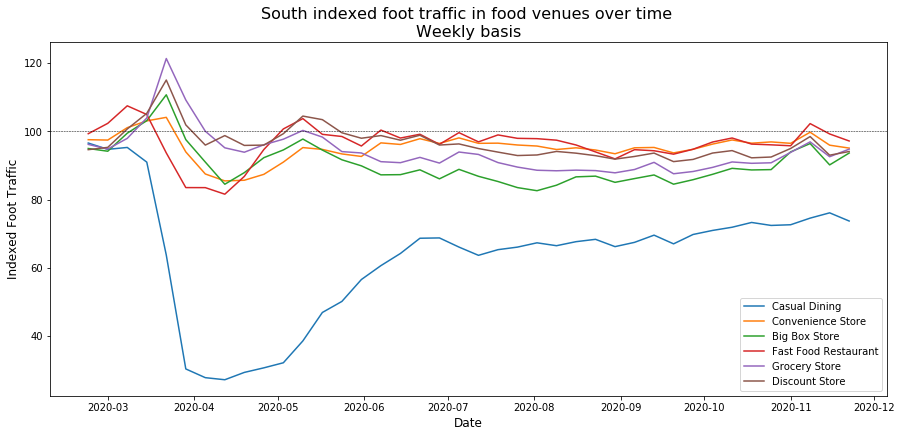

In [142]:
regional_venues('South')

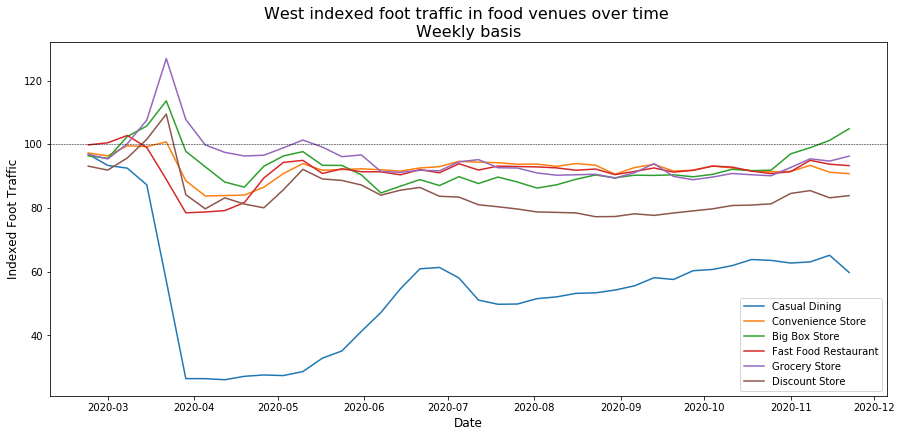

In [143]:
regional_venues('West')

### Number and Duration of visits to Casual Dining versus Fast Food

In [160]:
df_foursquare_states.head()

,NAME,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,...,2020-10-21,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,category
0,Alabama,1300672.0,1441176.0,1729554.0,1871494.0,1734159.0,1517037.0,1566957.0,1572101.0,1616301.0,...,1671856.0,1813200.0,1978832.0,1956772.0,1858730.0,1611078.0,1635177.0,1640566.0,1759420.0,visits_Food
1,Alaska,175497.0,151499.0,184125.0,191059.0,188762.0,162335.0,178630.0,170998.0,174510.0,...,196608.0,183126.0,201748.0,235417.0,183356.0,160133.0,174813.0,177277.0,173179.0,visits_Food
2,Arizona,2116684.0,2191324.0,2459041.0,2710903.0,2511332.0,2059000.0,2070288.0,2128277.0,2194058.0,...,2050148.0,2111632.0,2271326.0,2688505.0,2538440.0,2021562.0,1969209.0,2077036.0,2145801.0,visits_Food
3,Arkansas,895376.0,965789.0,1121053.0,1167509.0,1061367.0,946969.0,945236.0,970525.0,983389.0,...,1053230.0,1082854.0,1211990.0,1292168.0,1128542.0,950241.0,978044.0,1028142.0,1059500.0,visits_Food
4,California,14702527.0,14781201.0,16297438.0,17876757.0,17302822.0,14361520.0,13728426.0,14111951.0,14337026.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,visits_Food


In [161]:
df_foursquare_states.category.unique()

array(['visits_Food', 'p50Duration_Food', 'avgDuration_Food',
       'visits_Fast Food Restaurants', 'p50Duration_Fast Food Restaurants',
       'avgDuration_Fast Food Restaurants'], dtype=object)

In [163]:
date_columns = df_foursquare_states.columns[1:-1]
date_nocolumns = ['NAME', 'category']

In [166]:
df_foursquare_states_melt = pd.melt(df_foursquare_states, 
                                    value_vars=date_columns,
                                    var_name='date', id_vars=date_nocolumns)

In [169]:
order_states_avg = df_foursquare_states_melt[df_foursquare_states_melt.category == 'visits_Food'].groupby('NAME')['value'].mean().sort_values(ascending=True)

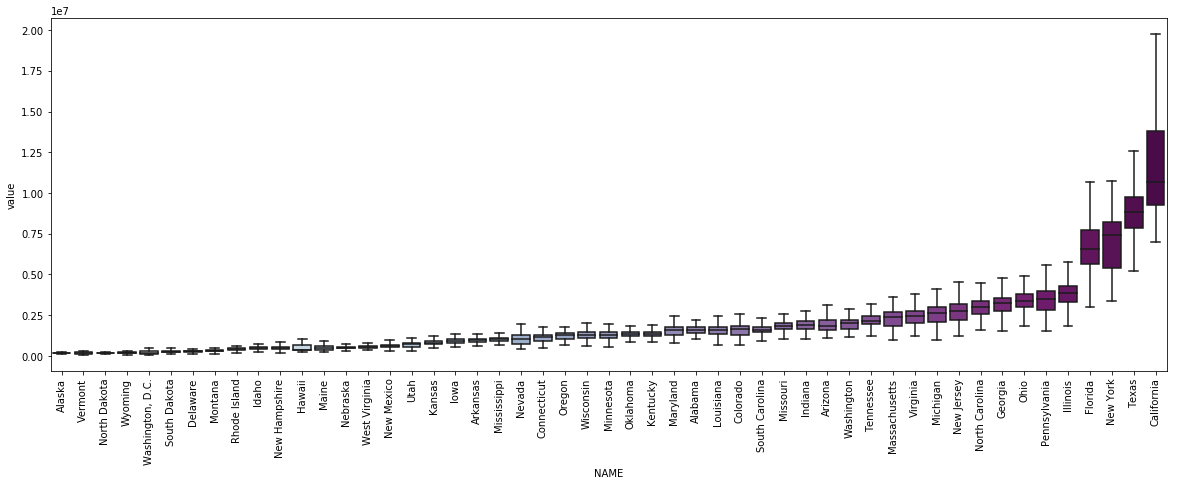

In [171]:
_ = plt.figure(figsize=(20, 6.5))
_ = sns.boxplot(x='NAME', 
                y='value', 
                data=df_foursquare_states_melt[df_foursquare_states_melt.category == 'visits_Food'], 
                showfliers=False, 
                palette='BuPu',
                order=order_states_avg.index)
_ = plt.xticks(rotation=90)

In [175]:
order_states_avg = df_foursquare_states_melt[df_foursquare_states_melt.category == 'p50Duration_Food'].groupby('NAME')['value'].mean().sort_values(ascending=True)

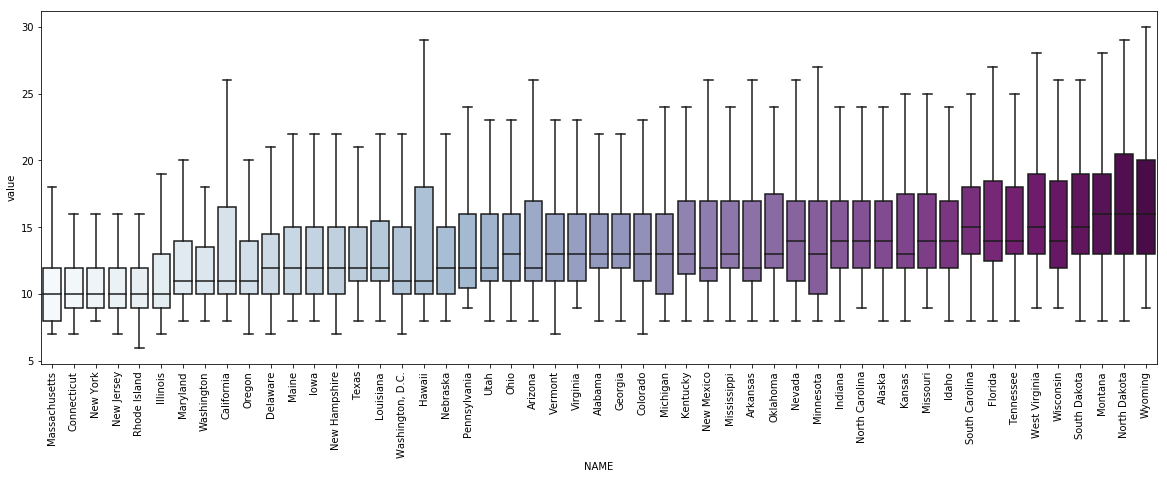

In [176]:
_ = plt.figure(figsize=(20, 6.5))
_ = sns.boxplot(x='NAME', 
                y='value', 
                data=df_foursquare_states_melt[df_foursquare_states_melt.category == 'p50Duration_Food'], 
                showfliers=False, 
                palette='BuPu',
                order=order_states_avg.index)
_ = plt.xticks(rotation=90)

In [177]:
order_states_avg = df_foursquare_states_melt[df_foursquare_states_melt.category == 'visits_Fast Food Restaurants'].groupby('NAME')['value'].mean().sort_values(ascending=True)

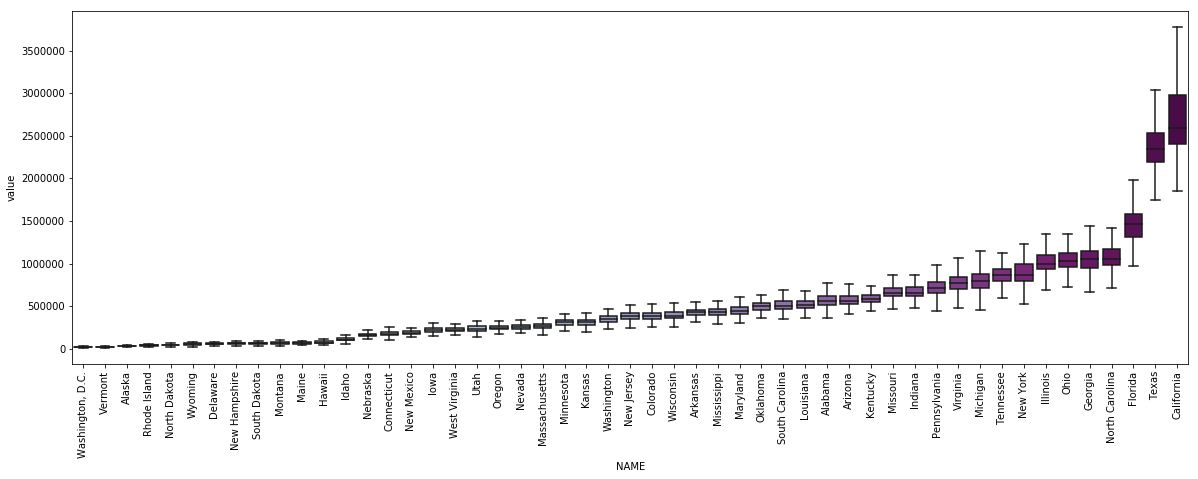

In [178]:
_ = plt.figure(figsize=(20, 6.5))
_ = sns.boxplot(x='NAME', 
                y='value', 
                data=df_foursquare_states_melt[df_foursquare_states_melt.category == 'visits_Fast Food Restaurants'], 
                showfliers=False, 
                palette='BuPu',
                order=order_states_avg.index)
_ = plt.xticks(rotation=90)

In [180]:
df_Cal = df_foursquare_states_melt[(df_foursquare_states_melt.NAME == 'California') & 
                              (df_foursquare_states_melt.category == 'visits_Fast Food Restaurants') | 
                              (df_foursquare_states_melt.category == 'visits_Food')]

In [182]:
df_Cal.head()

,NAME,category,date,value
0,Alabama,visits_Food,2020-01-01,1300672.0
1,Alaska,visits_Food,2020-01-01,175497.0
2,Arizona,visits_Food,2020-01-01,2116684.0
3,Arkansas,visits_Food,2020-01-01,895376.0
4,California,visits_Food,2020-01-01,14702527.0


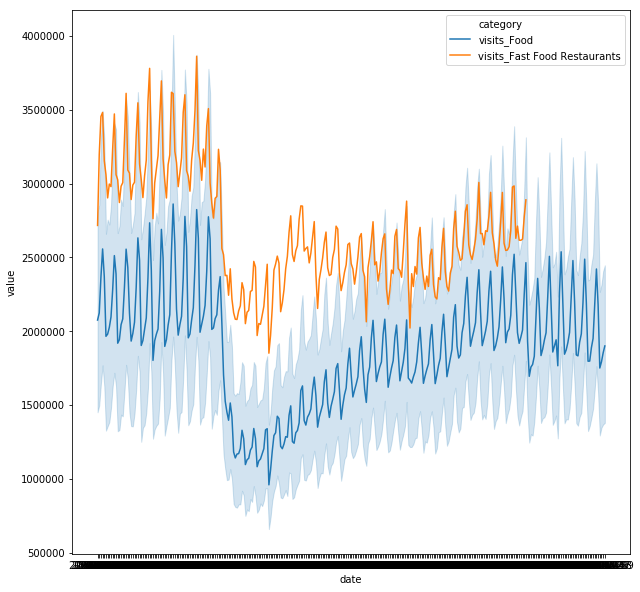

In [183]:
_ = sns.lineplot(data=df_Cal, x='date', y='value', hue='category')

In [184]:
df_Cal = df_foursquare_states_melt[(df_foursquare_states_melt.NAME == 'California') & 
                              (df_foursquare_states_melt.category == 'p50Duration_Food') | 
                              (df_foursquare_states_melt.category == 'p50Duration_Fast Food Restaurants')]

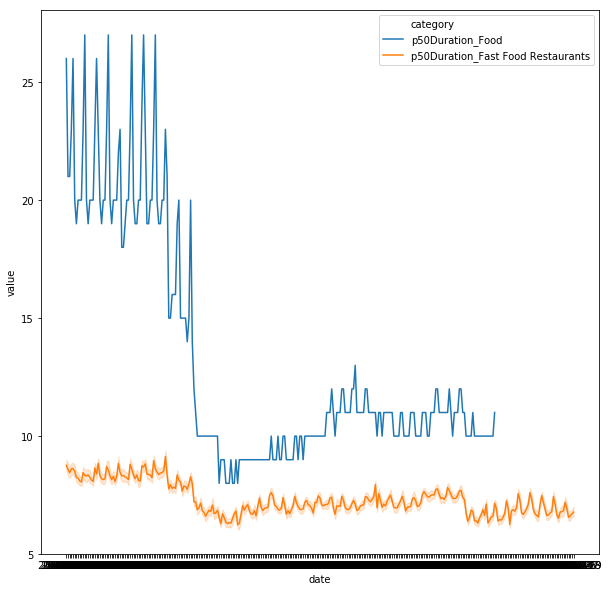

In [185]:
_ = sns.lineplot(data=df_Cal, x='date', y='value', hue='category')

## Descartes Lab Mobility:  

## How much has changed the distance that people move daily?

I. Descartes Lab Mobility Change
These datasets show how visits and length of stay at different places change compared to a baseline.

- m50_max: The median of the max-distance mobility for all samples in the specified region. 
- m50_percent: The percent of normal m50 in the region.

What is m50?
The baseline is defined as the median of max distance mobility measured during 2020-02-17 to 2020-03-07.

The file named `m50_max_states.csv` shows the median of the max-distance mobility for all samples in the specified state.

The file named `m50_percent_states.csv` shows the percent of normal m50 in the specified state.

Data Sources: Descarteslabs: Data for Mobility Changes in Response to COVID-19 https://github.com/descarteslabs/DL-COVID-19
People Contribution & Credit: Xiaokang Fu, Tao Hu, data crawler, data quality control and data validation

In [189]:
df_descartes_states_max = pd.read_csv('../data/interim/mobility/m50_max_states.csv')
df_descartes_states_percent = pd.read_csv('../data/interim/mobility/m50_percent_states.csv')

Let's check the median of the maximum distance measured every day from March:

In [188]:
df_descartes_states.head()

,STATE,NAME,country_code,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,...,2020-10-21,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30
0,1,Alabama,US,79.0,98.0,100.0,96.0,104.0,123.0,107.0,...,94.0,94.0,110.0,76.0,63.0,84.0,89.0,83.0,87.0,108.0
1,2,Alaska,US,20.0,86.0,94.0,100.0,101.0,108.0,58.0,...,90.0,96.0,100.0,72.0,30.0,75.0,85.0,82.0,77.0,81.0
2,4,Arizona,US,60.0,96.0,98.0,100.0,106.0,114.0,91.0,...,65.0,71.0,81.0,65.0,38.0,57.0,64.0,65.0,69.0,73.0
3,5,Arkansas,US,73.0,97.0,100.0,97.0,105.0,125.0,108.0,...,89.0,91.0,104.0,86.0,56.0,74.0,80.0,77.0,85.0,103.0
4,6,California,US,60.0,98.0,100.0,99.0,106.0,111.0,87.0,...,44.0,49.0,59.0,42.0,21.0,40.0,45.0,43.0,47.0,54.0


In [194]:
date_nocolumns = df_descartes_states.columns[:3]
date_columns = df_descartes_states.columns[3:]

df_descartes_states_melt = pd.melt(df_descartes_states, 
                                   id_vars=date_nocolumns, 
                                   value_vars=date_columns, 
                                   value_name='m50_max', 
                                   var_name='date')

In [196]:
df_descartes_states_melt.head(2)

,STATE,NAME,country_code,date,m50_max
0,1,Alabama,US,2020-03-01,79.0
1,2,Alaska,US,2020-03-01,20.0


In [197]:
df_descartes_states_melt['date'] = df_descartes_states_melt.date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

### Decompose trends and seasonality

In [199]:
sort_states = df_descartes_states_melt.groupby('NAME')['m50_max'].mean().sort_values(ascending=True)

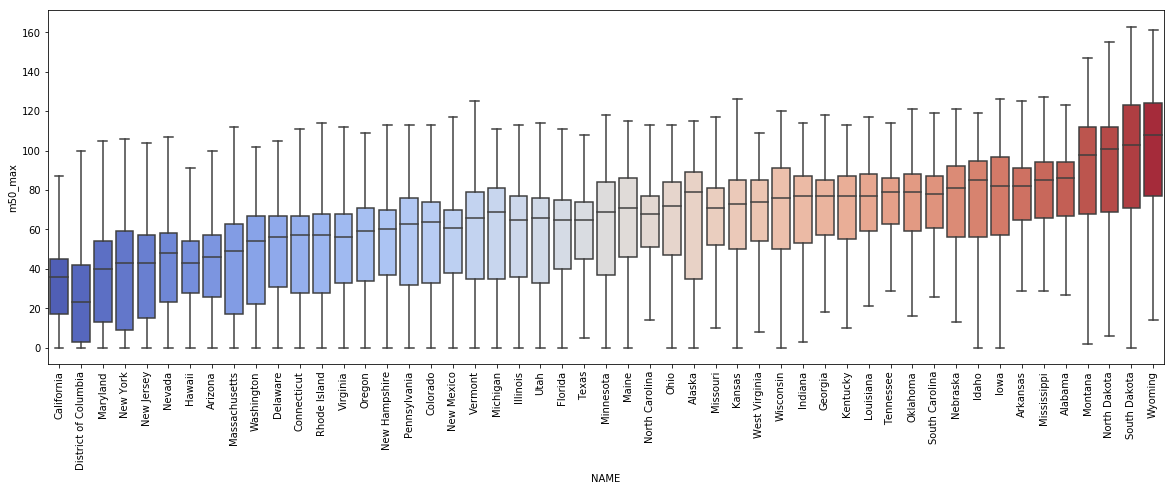

In [201]:
_ = plt.figure(figsize=(20, 6.5))
_ = sns.boxplot(x='NAME', 
                y='m50_max', 
                data=df_descartes_states_melt, 
                showfliers=False, 
                palette='coolwarm',
                order=sort_states.index)
# _ = plt.axhline(y=100, color='k', linestyle='--', label='Baseline, January 13th, 2020', lw=0.5)
_ = plt.xticks(rotation=90)

In [190]:
df_descartes_states_percent.head()

,STATE,NAME,country_code,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,...,2020-10-21,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30
0,1,Alabama,US,8.331,10.398,10.538,10.144,10.982,13.024,11.373,...,9.980,9.908,11.684,8.053,6.684,8.868,9.398,8.766,9.253,11.410
1,2,Alaska,US,0.808,3.463,3.791,4.003,4.072,4.351,2.337,...,3.638,3.848,4.030,2.906,1.208,3.029,3.409,3.312,3.106,3.274
2,4,Arizona,US,4.749,7.555,7.665,7.819,8.359,8.954,7.167,...,5.144,5.575,6.354,5.138,2.987,4.514,5.068,5.134,5.440,5.784
3,5,Arkansas,US,7.026,9.268,9.547,9.347,10.079,11.948,10.333,...,8.550,8.709,9.995,8.238,5.407,7.076,7.678,7.438,8.182,9.906
4,6,California,US,4.122,6.725,6.842,6.827,7.270,7.649,5.970,...,3.070,3.412,4.101,2.942,1.473,2.747,3.106,3.004,3.241,3.708


In [202]:
date_nocolumns = df_descartes_states_percent.columns[:3]
date_columns = df_descartes_states_percent.columns[3:]

df_descartes_states_percent = pd.melt(df_descartes_states_percent, 
                                   id_vars=date_nocolumns, 
                                   value_vars=date_columns, 
                                   value_name='m50_max_percent', 
                                   var_name='date')

In [203]:
df_descartes_states_percent['date'] = df_descartes_states_percent.date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

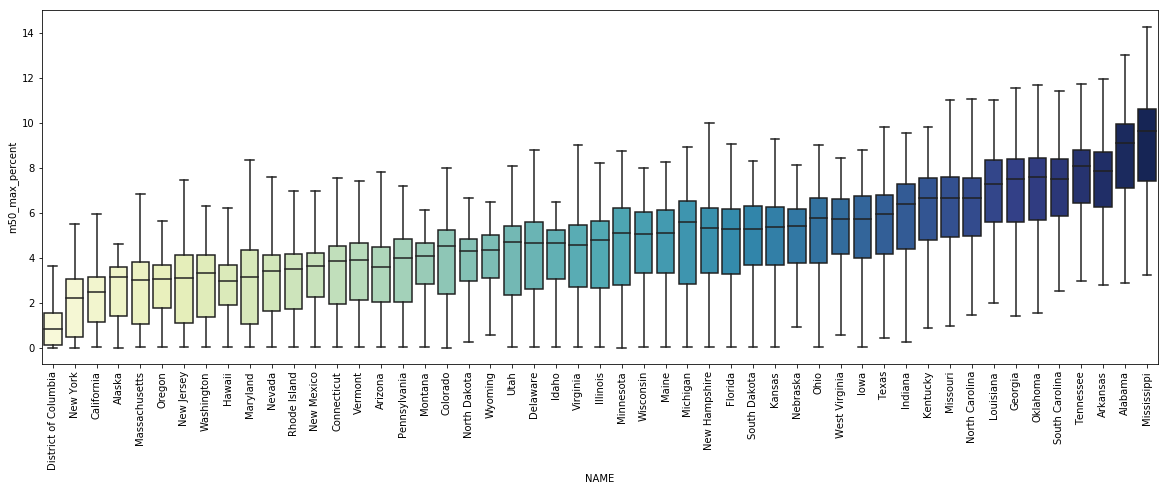

In [205]:
sort_states = df_descartes_states_percent.groupby('NAME')['m50_max_percent'].mean().sort_values(ascending=True)

_ = plt.figure(figsize=(20, 6.5))
_ = sns.boxplot(x='NAME', 
                y='m50_max_percent', 
                data=df_descartes_states_percent, 
                showfliers=False, 
                palette='YlGnBu',
                order=sort_states.index)
# _ = plt.axhline(y=100, color='k', linestyle='--', label='Baseline, January 13th, 2020', lw=0.5)
_ = plt.xticks(rotation=90)

Let's plot some examples:

In [206]:
df_descartes_states_percent['NAME'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
       'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
       'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming'], dtype=object)

In [207]:
states_dict = {'Northeast': ['Maine', 'New Hampshire', 
                             'Vermont', 'Massachusetts', 
                             'Rhode Island', 'Connecticut', 
                             'New York', 'New Jersey',
                             'Pennsylvania'],
               'Midwest':   ['Ohio', 'Michigan', 
                             'Indiana', 'Wisconsin', 
                             'Illinois', 'Minnesota', 
                             'Iowa', 'Missouri', 
                             'North Dakota', 'South Dakota', 
                             'Nebraska', 'Kansas'],
               'South':     ['Delaware', 'Maryland',
                             'Virginia', 'West Virginia', 
                             'Kentucky', 'North Carolina', 
                             'South Carolina', 'Tennessee', 
                             'Georgia', 'Florida', 
                             'Alabama','Mississippi', 
                             'Arkansas', 'Louisiana', 
                             'Texas', 'Oklahoma',
                            'District of Columbia'],
               'West':     ['Montana', 'Idaho', 
                            'Wyoming', 'Colorado', 
                            'New Mexico', 'Arizona', 
                            'Utah', 'Nevada', 
                            'California', 'Oregon', 
                            'Washington', 'Alaska', 'Hawaii']}

In [227]:
df_states = pd.DataFrame.from_dict(states_dict, orient='index').stack().reset_index().loc[:, ['level_0', 0]].rename(columns={'level_0': 'region', 0: 'state'})

In [228]:
df_states.head()

,region,state
0,Northeast,Maine
1,Northeast,New Hampshire
2,Northeast,Vermont
3,Northeast,Massachusetts
4,Northeast,Rhode Island


In [230]:
df_descartes_states_percent_region = df_descartes_states_percent.merge(df_states, left_on='NAME', right_on='state')

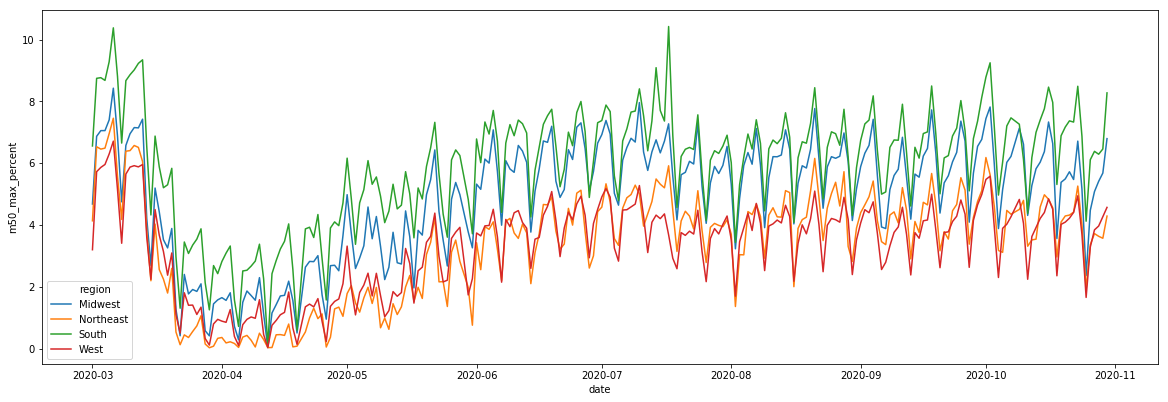

In [234]:
_ = plt.figure(figsize=(20, 6.5))
_ = sns.lineplot(data=df_descartes_states_percent_region.groupby(['region', 'date']).mean().reset_index(),
                x='date',
                y='m50_max_percent',
                hue='region')

#### Resampling

In [235]:
df = df_descartes_states_percent_region.copy()
df.set_index('date', inplace=True)

df_midwest = df[df.region == 'Midwest'].resample('W').mean()
df_northeast = df[df.region == 'Northeast'].resample('W').mean()
df_south = df[df.region == 'South'].resample('W').mean()
df_west = df[df.region == 'West'].resample('W').mean()

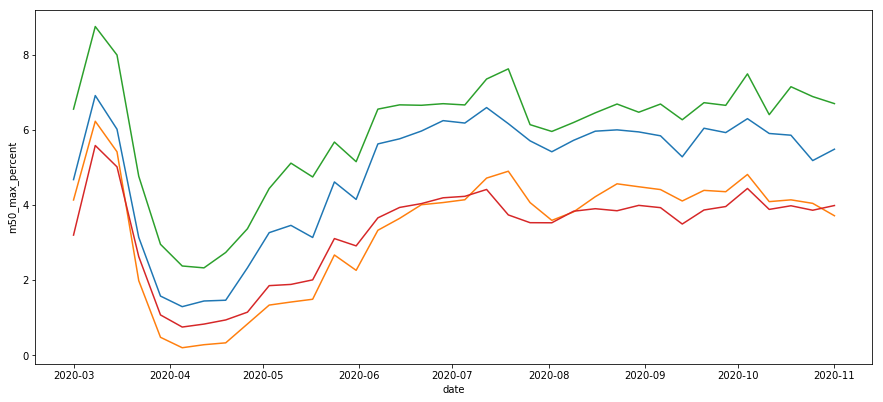

In [238]:
_ = plt.figure(figsize=(15, 6.5))
_ = sns.lineplot(data=df_midwest, x=df_midwest.index, y='m50_max_percent')
_ = sns.lineplot(data=df_northeast, x=df_northeast.index, y='m50_max_percent')
_ = sns.lineplot(data=df_south, x=df_south.index, y='m50_max_percent')
_ = sns.lineplot(data=df_west, x=df_west.index, y='m50_max_percent')

#### Follow up: Are the restaurants in the northeast and west regions suffering more disruptions?

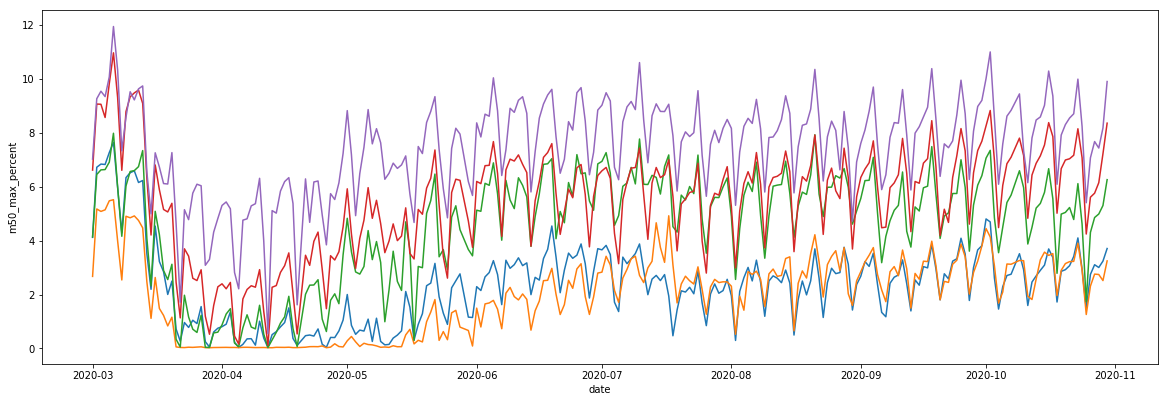

In [247]:
_ = plt.figure(figsize=(20, 6.5))
_ = sns.lineplot(data=df_descartes_states_percent_region[df_descartes_states_percent_region.state == 'California'],
                x='date',
                y='m50_max_percent')
_ = sns.lineplot(data=df_descartes_states_percent_region[df_descartes_states_percent_region.state == 'New York'],
                x='date',
                y='m50_max_percent')
_ = sns.lineplot(data=df_descartes_states_percent_region[df_descartes_states_percent_region.state == 'Wisconsin'],
                x='date',
                y='m50_max_percent')
_ = sns.lineplot(data=df_descartes_states_percent_region[df_descartes_states_percent_region.state == 'Texas'],
                x='date',
                y='m50_max_percent')
_ = sns.lineplot(data=df_descartes_states_percent_region[df_descartes_states_percent_region.state == 'Arkansas'],
                x='date',
                y='m50_max_percent')